### Muhammed Hassen
### Title: taffic sign classfication

### 1.Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras

### 2. Visualizing The Dataset

In [7]:

train_path = 'Train'
test_path = 'Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [8]:
# Finding Total Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [9]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

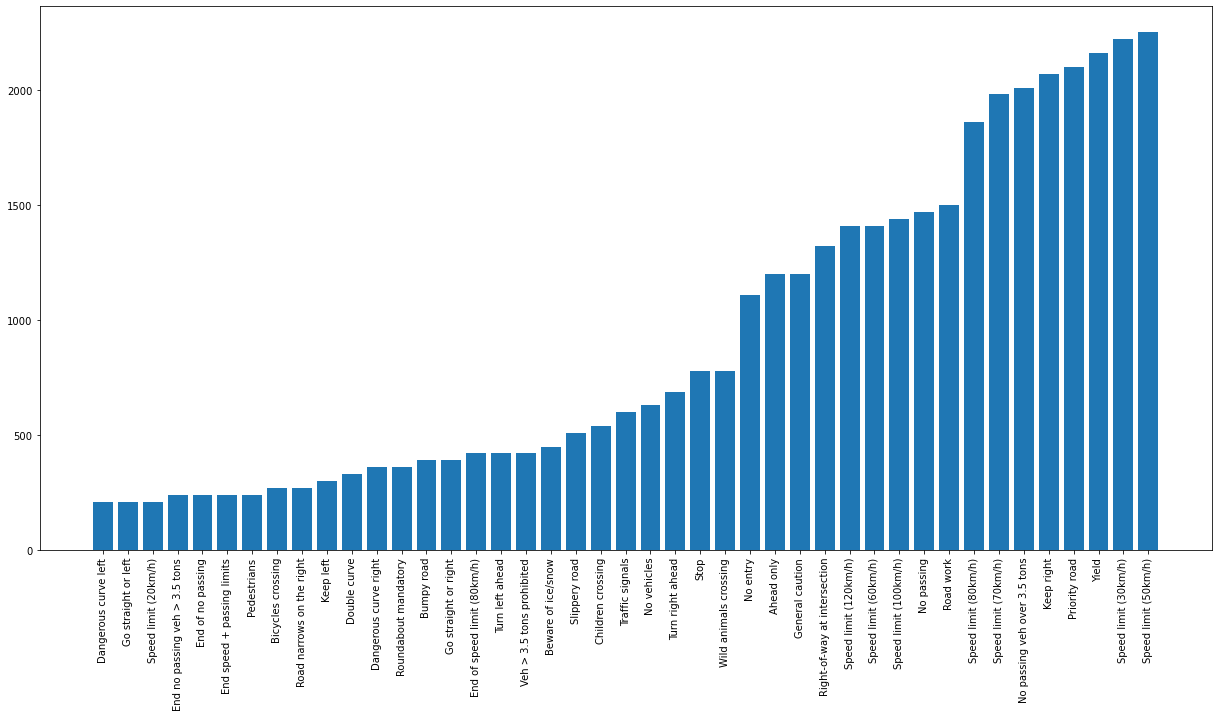

In [10]:
# Plotting the number of images in each class in ascending order
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

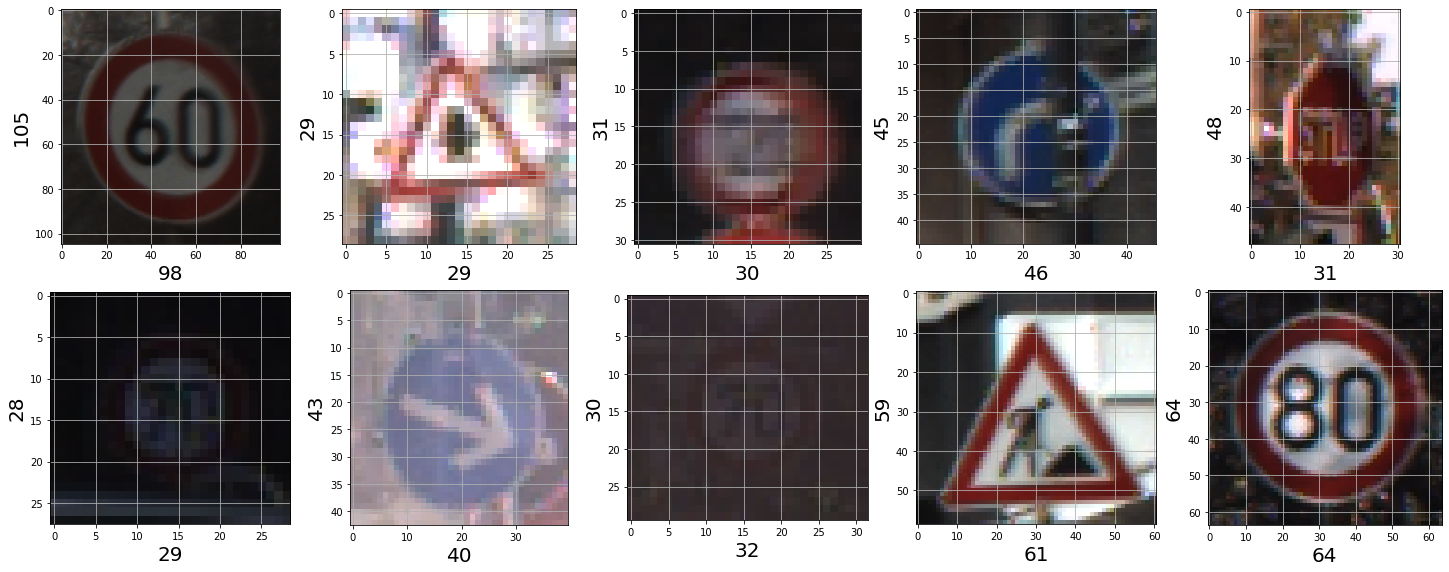

In [11]:
# Visualizing 10 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv( 'Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,11):
    plt.subplot(5,5,i)
    random_img_path = random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of imag

### 3. Load the Training Data

In [12]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path =  'Train/' + str(i)
    images = os.listdir(path)
    
    n=0
    for img in images:
        try:
            if n<240:
                n=n+1
                #image = cv2.imread(path + '/' + img)
                #path =path+'/'
                #print(path)
                image = cv2.imread(os.path.join(path+ '/',img),1)
                image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                resize_image = cv2.resize(image,(IMG_HEIGHT,IMG_WIDTH))
                resize_image=np.reshape(resize_image,(IMG_HEIGHT * IMG_WIDTH,3))
                #image_fromarray = Image.fromarray(image, 'RGB')
                #resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
                image_data.append(np.array(resize_image))
                image_labels.append(i)
            else :
                break
        except:
            print("Error in " + img)
            break

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels= np.array(image_labels)

print(image_data.shape, image_labels.shape)

(10230, 900, 3) (10230,)


In [13]:
#Shuffling the training data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [14]:
#number of total training data
print(len(image_data))

10230


In [15]:
#reshape the training data
image_data1=[]
for i in range(10230):
    image_data1.append(np.array(image_data[i:i+1]).reshape(30,30,3))
image_data1=np.array(image_data1)
print("image_data1 shape:", image_data1.shape)

image_data1 shape: (10230, 30, 30, 3)


In [16]:
#Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data1, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (7161, 30, 30, 3)
X_valid.shape (3069, 30, 30, 3)
y_train.shape (7161,)
y_valid.shape (3069,)


In [18]:
# change the class data type to catgorical
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(7161, 43)
(3069, 43)


### 3.model devlopment

In [21]:

model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [27]:
lr = 0.001
epochs = 10


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val))

Train on 7161 samples, validate on 3069 samples
Epoch 1/10
7161/7161 [==============================] - 48s 7ms/sample - loss: 0.1002 - acc: 0.9717 - val_loss: 0.0978 - val_acc: 0.9730
Epoch 2/10
7161/7161 [==============================] - 46s 6ms/sample - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0528 - val_acc: 0.9896
Epoch 3/10
7161/7161 [==============================] - 46s 6ms/sample - loss: 0.0240 - acc: 0.9934 - val_loss: 0.0614 - val_acc: 0.9853
Epoch 4/10
7161/7161 [==============================] - 47s 7ms/sample - loss: 0.0106 - acc: 0.9965 - val_loss: 0.0430 - val_acc: 0.9886
Epoch 5/10
7161/7161 [==============================] - 47s 7ms/sample - loss: 0.0090 - acc: 0.9976 - val_loss: 0.0384 - val_acc: 0.9915
Epoch 6/10
7161/7161 [==============================] - 47s 7ms/sample - loss: 0.0369 - acc: 0.9902 - val_loss: 0.0692 - val_acc: 0.9814
Epoch 7/10
7161/7161 [==============================] - 49s 7ms/sample - loss: 0.0273 - acc: 0.9918 - val_loss: 0.0452 - val_acc: 

### 4. Evaluating the mode

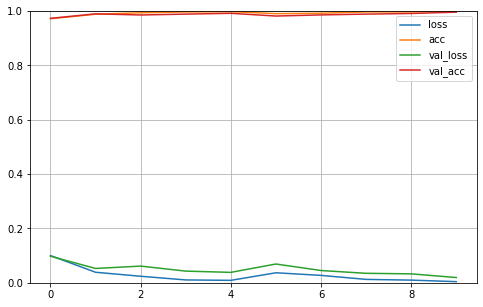

In [29]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [30]:
model.save("model.h5")

In [38]:
test = pd.read_csv( 'Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(   img)
        image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resize_image = cv2.resize(image,(IMG_HEIGHT,IMG_WIDTH))
        resize_image=np.reshape(resize_image,(IMG_HEIGHT * IMG_WIDTH,3))
                #image_fromarray = Image.fromarray(image, 'RGB')
                #resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
      
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

print("X_test  shape:", X_test.shape)


X_test  shape: (12630, 900, 3)


In [41]:
X_test1=[]
for i in range(12630):
    X_test1.append(np.array(X_test[i:i+1]).reshape(30,30,3))
X_test1=np.array(X_test1)
print("X_test  shape:", X_test1.shape)

X_test  shape: (12630, 30, 30, 3)


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
pred = model.predict_classes(X_test1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  90.00791765637372


In [46]:
cf = confusion_matrix(labels, pred)

<AxesSubplot:>

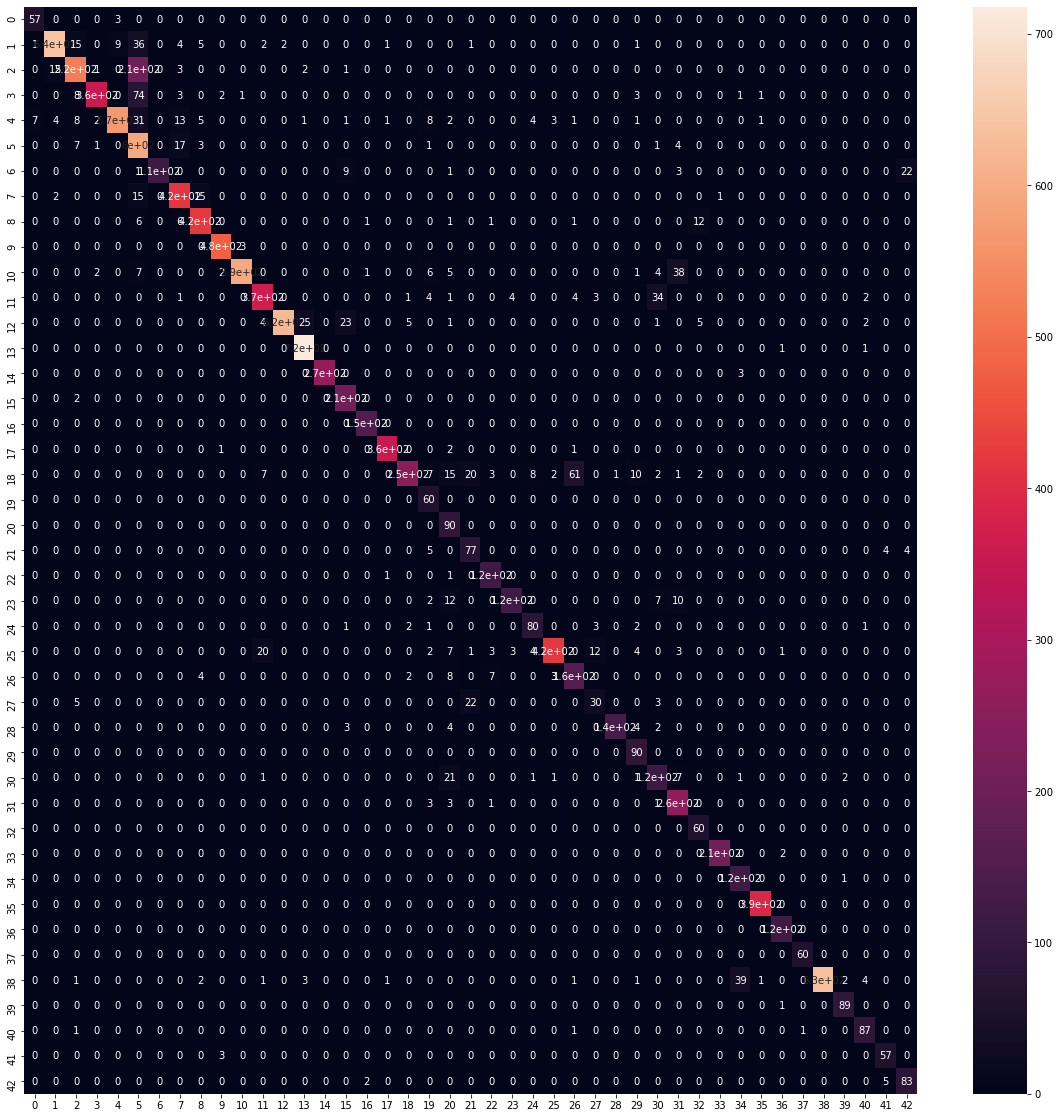

In [47]:
#Visualizing the confusion matrix


df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)